In [71]:
from deepface import DeepFace 
import cv2
from matplotlib import pyplot as plt
import random as rd
import os
import time
import face_recognition as fc
import numpy as np
# from mtcnn import MTCNN

In [93]:
img_path1 = 'images/aziz2.jpg'
img_path_person = 'images/image429268.png'
img_path2 = 'db/19B030068/2.png'

In [51]:
try:
  img1 = DeepFace.extract_faces(img_path1)
  img2 = DeepFace.extract_faces(img_path_person)
except:
  print("Face couldn't detected")

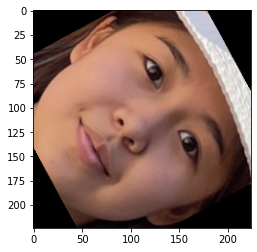

In [52]:
plt.imshow(img1[0]['face'])


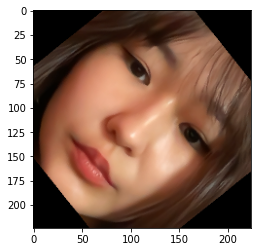

In [53]:
plt.imshow(img2[0]['face'])


In [56]:
represent1 = DeepFace.represent(img_path1)
represent2 = DeepFace.represent(img_path_person)


In [70]:
represent1[0]['embedding']


[0.009778408333659172,
 0.025462279096245766,
 0.014100735075771809,
 0.003617236390709877,
 0.025207191705703735,
 0.012811459600925446,
 0.01732911542057991,
 0.01532980427145958,
 0.019417013972997665,
 0.013764305040240288,
 0.025003839284181595,
 0.011341014876961708,
 0.014134235680103302,
 0.01122068427503109,
 0.024678297340869904,
 0.0021417958196252584,
 0.028730781748890877,
 0.023932887241244316,
 0.0186323169618845,
 0.03763669356703758,
 0.017687326297163963,
 0.021560322493314743,
 0.00870793778449297,
 0.009720122441649437,
 0.022298799827694893,
 0.021276816725730896,
 0.013175216503441334,
 0.027247367426753044,
 0.015148136764764786,
 0.008875753730535507,
 0.02390962652862072,
 0.01803750917315483,
 0.01300877332687378,
 0.02381032146513462,
 0.009065836668014526,
 0.017497211694717407,
 0.021324895322322845,
 0.013108847662806511,
 0.014576336368918419,
 0.025893734768033028,
 0.01238670852035284,
 0.020437130704522133,
 0.009877195581793785,
 -0.002928689820691943

In [86]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# euclidean_distance(represent1[0]['embedding'], represent2[0]['embedding'])
# represent1[0]['embedding'], represent2[0]['embedding']
print(
np.linalg.norm(np.array(represent1[0]['embedding']) - np.array(represent2[0]['embedding'])),
euclidean_distance(np.array(represent1[0]['embedding']), np.array(represent2[0]['embedding']))/2)

0.3412064862049769 0.17060324310248856


In [87]:
cosine = np.dot(np.array(represent1[0]['embedding']), np.array(represent2[0]['embedding']))/(np.linalg.norm(represent1[0]['embedding'])*np.linalg.norm(represent2[0]['embedding']))
cosine

0.7652536565071927

In [88]:
matches = fc.compare_faces(np.array(represent1[0]['embedding']), np.array(represent2[0]['embedding']))
matches

AxisError: axis 1 is out of bounds for array of dimension 1

In [61]:

res = DeepFace.verify(img1_path=img_path1, img2_path=img_path_person, model_name='Facenet')
res1 = DeepFace.verify(img1_path=img_path1, img2_path=img_path_person, model_name='VGG-Face')
res5 = DeepFace.verify(img1_path=img_path1, img2_path=img_path_person, model_name='ArcFace')


In [62]:
res, '\n', res1, '\n', res5

({'verified': True,
  'distance': 0.17079391542083822,
  'threshold': 0.4,
  'model': 'Facenet',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 52, 'y': 343, 'w': 490, 'h': 490},
   'img2': {'x': 441, 'y': 205, 'w': 426, 'h': 426}},
  'time': 0.35},
 '\n',
 {'verified': True,
  'distance': 0.23474634349280799,
  'threshold': 0.4,
  'model': 'VGG-Face',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 52, 'y': 343, 'w': 490, 'h': 490},
   'img2': {'x': 441, 'y': 205, 'w': 426, 'h': 426}},
  'time': 0.21},
 '\n',
 {'verified': True,
  'distance': 0.013030560550883474,
  'threshold': 0.68,
  'model': 'ArcFace',
  'detector_backend': 'opencv',
  'similarity_metric': 'cosine',
  'facial_areas': {'img1': {'x': 52, 'y': 343, 'w': 490, 'h': 490},
   'img2': {'x': 441, 'y': 205, 'w': 426, 'h': 426}},
  'time': 0.28})

FaceNet

In [320]:
resStart1 = time.time()
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='Facenet')
resEnd1 = time.time()

differenceTime1 = resEnd1 - resStart1
print("FaceNet Speed", differenceTime1) 

FaceNet Speed 0.6076719760894775


VGG-Face

In [321]:
resStart2 = time.time()
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='VGG-Face')
resEnd2 = time.time()

differenceTime2 = resEnd2 - resStart2

print("VGG-Face Speed", differenceTime2) 

VGG-Face Speed 0.5653460025787354


ArcFace

In [322]:
resStart3 = time.time()
DeepFace.verify(img1_path=img_path1, img2_path=img_path2, model_name='ArcFace')
resEnd3 = time.time()

differenceTime3 = resEnd3 - resStart3
differenceTime3
print("ArcFace Speed", differenceTime3) 


ArcFace Speed 0.42497801780700684


In [253]:
res1

{'verified': True,
 'distance': 0.27104987309869777,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 193, 'y': 376, 'w': 420, 'h': 420},
  'img2': {'x': 126, 'y': 311, 'w': 400, 'h': 400}},
 'time': 2.35}

In [96]:
ana = DeepFace.analyze(img_path_person)
ana

Action: race: 100%|██████████| 4/4 [00:00<00:00, 22.02it/s]  


[{'emotion': {'angry': 8.048501740631764e-05,
   'disgust': 3.4660796910564173e-11,
   'fear': 99.84813332557678,
   'happy': 0.1481730374507606,
   'sad': 1.086695888830036e-05,
   'surprise': 0.00126170434668893,
   'neutral': 0.002337175828870386},
  'dominant_emotion': 'fear',
  'region': {'x': 441, 'y': 205, 'w': 426, 'h': 426},
  'age': 31,
  'gender': {'Woman': 74.12520051002502, 'Man': 25.874799489974976},
  'dominant_gender': 'Woman',
  'race': {'asian': 63.866858021395444,
   'indian': 2.6398821380874944,
   'black': 0.8497836917896638,
   'white': 17.34120490059794,
   'middle eastern': 3.4510373680547035,
   'latino hispanic': 11.85122810587548},
  'dominant_race': 'asian'}]

In [40]:
dfs = DeepFace.find(img_path=img_path1, db_path='deleted', model_name='Facenet')

There are  37  representations found in  representations_facenet.pkl
find function lasts  0.10150814056396484  seconds


In [41]:
dfs

[                   identity  source_x  source_y  source_w  source_h  \
 0   deleted/19B030068/2.png        76       109       312       312   
 1   deleted/19B030068/9.png        76       109       312       312   
 2  deleted/19B030067/10.png        76       109       312       312   
 3   deleted/19B030068/5.png        76       109       312       312   
 
    Facenet_cosine  
 0        0.094742  
 1        0.156940  
 2        0.167082  
 3        0.230080  ]

In [46]:
new_path = dfs[0].iloc[0]['identity']
new_path

'deleted/19B030222/1.png'

In [47]:
res_compare = DeepFace.verify(img1_path=img_path1, img2_path=new_path, model_name='Facenet')

In [48]:
res_compare

{'verified': True,
 'distance': 0.2645570274215987,
 'threshold': 0.4,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 164, 'y': 284, 'w': 616, 'h': 616},
  'img2': {'x': 246, 'y': 522, 'w': 261, 'h': 261}},
 'time': 0.26}